In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:

model_path='/content/drive/MyDrive/finial_project/my_model.h5'
from keras.models import load_model
model = load_model(model_path)

In [ ]:
car_path = '/content/drive/MyDrive/finial_project/images/Cars0.png'
car = cv2.imread(car_path,cv2.IMREAD_UNCHANGED)
car = cv2.resize(car, (224,224))

x= car.reshape((1,) + car.shape)
predicted_image = model.predict(x)

ny = predicted_image[0]*255


### OCR

In [ ]:
# cd /content/drive/MyDrive/finial_project/OCR/

In [ ]:
!pip install ArabicOcr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 19 kB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 


Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...
[INFO] 0.5833: ٤GYPT
[INFO] 0.9330: مصر
[INFO] 0.6880: سم ر ٦٦٦
<Response [200]>


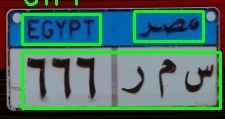

the plate number is: سم ر ٦٦٦


In [ ]:
from ArabicOcr import arabicocr
out_image='out2.jpg'
Red_car_path='/content/drive/MyDrive/finial_project/result/plate2.jpg'

# Red_car_path='/content/drive/MyDrive/finial_project/result/dk.png'

out_image='out.jpg'
results=arabicocr.arabic_ocr(Red_car_path, out_image)
# print(results)

words=[]
for i in range(len(results)):	
		word=results[i][1]
		words.append(word)
words.pop(0)
words.pop(0)


import json
import requests 
from google.colab.patches import cv2_imshow
import cv2

plate_number=""
for word in words:
  plate_number=plate_number+word

url = 'https://kartaa.herokuapp.com/'

def main():
    response = requests.post(url, json={"data": plate_number})
    print(response)
    exit(0)

if __name__ == '__main__':
    main()
    img = cv2.imread('out.jpg', cv2.IMREAD_UNCHANGED)
    cv2_imshow(img)
    print("the plate number is:",plate_number)


In [ ]:
words=[]
for i in range(len(results)):	
		word=results[i][1]
		words.append(word)
words.pop(0)
words.pop(0)
# print(word)

In [ ]:
print(words)

Connecting Firebase 

In [ ]:
import json
import requests

# plate = word[0]+word[1]
# print(words)
plate = words[1]+words[0]
# print(plate)

url = 'https://kartaa.herokuapp.com/'

def main():
    response = requests.post(url, json={"data": plate})
    print(response)
    exit(0)

if __name__ == '__main__':
    main()
    print(plate)
